# Ch5 Singular Value Decomposition (SVD)

<a target="_blank" href="https://colab.research.google.com/github/DrJaewookLee/math4ai-notes/blob/main/Notebooks/ch05_Singular_Value_Decomposition.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores **Eigendecomposition** and **Singular Value Decomposition (SVD)** as a fundamental matrix factorization technique

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from skimage import data

## 5.1 Eigenvalues

### 5.1.3 On computing eigenvalues

In [130]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
L, V = np.linalg.eig(A) # eigenvalues and eigenvectors of A

In [131]:
print(L) # eigenvalues of A
L = np.asmatrix(np.diag(L)) # eigenvalues of A in diagonal matrix form
L

[ 7.9579162  -1.25766471  0.2997485 ]


matrix([[ 7.9579162 ,  0.        ,  0.        ],
        [ 0.        , -1.25766471,  0.        ],
        [ 0.        ,  0.        ,  0.2997485 ]])

In [132]:
V = np.asmatrix(V) # eigenvectors of A in matrix form
V

matrix([[-0.5297175 , -0.90730751,  0.28380519],
        [-0.44941741,  0.28662547, -0.39012063],
        [-0.71932146,  0.30763439,  0.87593408]])

In [133]:
print(np.sum(abs(V**2), axis=0))  # eigenvectors from np.linalg.eig are normalized

[[1.26138246 1.68805595 1.47640172]]


In [134]:
# check Av=λv
print(linalg.norm(A@V[:,0] - L[0,0]*V[:,0]))

3.233018248352212e-15


## 5.2 Singular Value Decomposition, SVD

### 5.2.3 Theory of the SVD

In [135]:
A = np.array([[3, 1, 1], [-1, 3, 1]])
A

array([[ 3,  1,  1],
       [-1,  3,  1]])

In [136]:
# Full SVD
U,s,V = linalg.svd(A, full_matrices=True)
print(U.shape,  s.shape, V.shape)

(2, 2) (2,) (3, 3)


In [137]:
U = np.asmatrix(U)
U

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [138]:
s = np.asmatrix(np.diag(s))
s

matrix([[3.46410162, 0.        ],
        [0.        , 3.16227766]])

In [139]:
V = np.asmatrix(V)
V

matrix([[-4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [-8.94427191e-01,  4.47213595e-01,  5.26260748e-16],
        [-1.82574186e-01, -3.65148372e-01,  9.12870929e-01]])

In [140]:
list(A.shape)

[2, 3]

In [141]:
np.min(list(A.shape))

np.int64(2)

In [142]:
S = np.zeros((A.shape))
for i in range(np.min(list(A.shape))) :
    S[i, i] = s[i,i]
S 

array([[3.46410162, 0.        , 0.        ],
       [0.        , 3.16227766, 0.        ]])

In [143]:
U@S@V  # check computation

matrix([[ 3.,  1.,  1.],
        [-1.,  3.,  1.]])

In [144]:
# Reduced SVD
U_r,s_r,V_r = linalg.svd(A,full_matrices=False)
print(U_r.shape,  s_r.shape, V_r.shape)

(2, 2) (2,) (2, 3)


In [145]:
U_r = np.asmatrix(U_r)
U_r

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [146]:
s_r = np.asmatrix(np.diag(s_r))
s_r

matrix([[3.46410162, 0.        ],
        [0.        , 3.16227766]])

In [147]:
V_r = np.asmatrix(V_r) # reduced V 
V_r

matrix([[-4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [-8.94427191e-01,  4.47213595e-01,  5.26260748e-16]])

In [148]:
U_r@s_r@V_r  # check computation

matrix([[ 3.,  1.,  1.],
        [-1.,  3.,  1.]])

### Image(Data) Compression with SVD

In [149]:
# Import image from `skimage`
img= data.camera()

print(f'Image size: {img.shape}')

Image size: (512, 512)


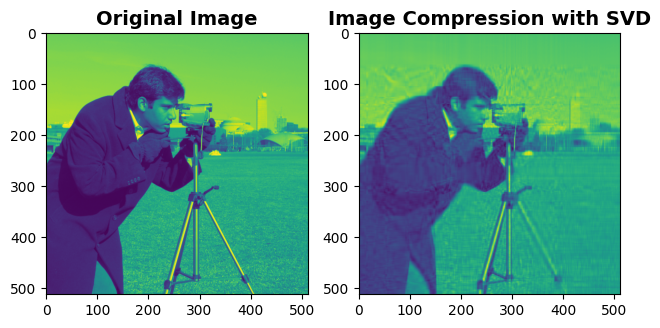

In [150]:
# Singular Value Decomposition
U, sigma, V_T = linalg.svd(img)
# Use only 32 singular values (new data name is 'A')
A = np.dot(U[:,0:32], np.dot(np.diag(sigma[0:32]), V_T[0:32,:]))
# Display original 'img' (first subplot)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image', fontsize=14, fontweight='bold')
# Display 'A' (second subplot)
plt.subplot(1, 2, 2)
plt.imshow(A)
plt.title('Image Compression with SVD', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [151]:
print(f'Original numbers to store: {img.shape[0]*img.shape[1]}')
print(f'Compressed data numbers: {U[:,0:32].shape[0]*U[:,0:32].shape[1]+32+V_T[0:32,:].shape[0]*V_T[0:32,:].shape[1]}')

Original numbers to store: 262144
Compressed data numbers: 32800


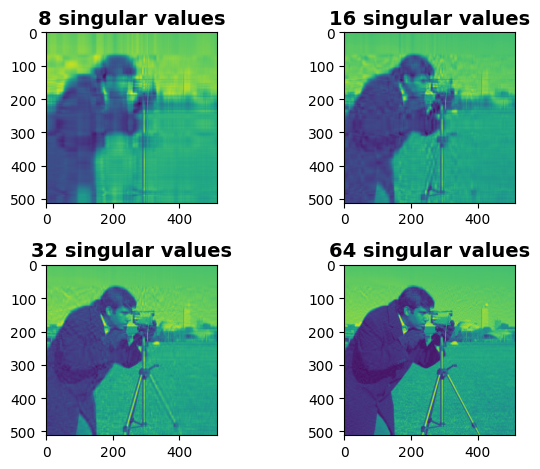

In [152]:
# What if we use fewer or more singular values?
A = np.dot(U[:,0:8], np.dot(np.diag(sigma[0:8]), V_T[0:8,:]))
B = np.dot(U[:,0:16], np.dot(np.diag(sigma[0:16]), V_T[0:16,:]))
C = np.dot(U[:,0:32], np.dot(np.diag(sigma[0:32]), V_T[0:32,:]))
D = np.dot(U[:,0:64], np.dot(np.diag(sigma[0:64]), V_T[0:64,:]))
# Display 'A' (first subplot)
plt.subplot(2, 2, 1)
plt.imshow(A)
plt.title('8 singular values', fontsize=14, fontweight='bold')
# Display 'B' (second subplot)
plt.subplot(2, 2, 2)
plt.imshow(B)
plt.title('16 singular values', fontsize=14, fontweight='bold')
# Display 'C' (third subplot)
plt.subplot(2, 2, 3)
plt.imshow(C)
plt.title('32 singular values', fontsize=14, fontweight='bold')
# Display 'D' (fourth subplot)
plt.subplot(2, 2, 4)
plt.imshow(D)
plt.title('64 singular values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()